In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

covid_data = pd.read_csv('google_new.csv')
covid_data.head(20)



,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0
5,AR,Argentina,2020-02-28,2.075,-7.859,-0.577,2.877,7.973,12.857,0,0
6,AR,Argentina,2020-02-29,4.685,-7.582,1.409,5.265,5.595,2.156,0,0
7,AR,Argentina,2020-03-01,2.873,-10.518,2.417,-2.509,0.944,-2.360,0,0
8,AR,Argentina,2020-03-02,3.958,-8.264,-1.363,0.537,6.931,16.164,0,0
9,AR,Argentina,2020-03-03,5.090,-6.241,-1.330,0.200,8.202,16.192,1,0


In [2]:
assert len(covid_data.loc[(covid_data['grocery_pharmacy'].isnull()) | 
               (covid_data['parks'].isnull()) | 
               (covid_data['residential'].isnull()) | 
               (covid_data['retail_recreation'].isnull()) |
               (covid_data['transit_stations'].isnull()) |
               (covid_data['workplaces'].isnull()) |
               (covid_data['total_cases'].isnull()) |
               (covid_data['fatalities'].isnull()) |
               (covid_data['iso'].isnull()) |
               (covid_data['country'].isnull()) |
               (covid_data['date'].isnull())]) == 0

In [3]:
covid_data.describe()

,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,-8.229424,-13.394035,9.545845,-26.205257,-28.370122,-19.126192,10699.773562,566.007344
std,21.313369,32.891636,10.545377,30.992728,30.211025,25.983021,31656.464952,2008.520488
min,-84.798000,-91.456000,-3.647000,-95.158000,-88.956000,-79.293000,0.000000,0.000000
25%,-16.578000,-32.841000,0.744000,-49.975000,-54.145000,-40.582000,27.000000,0.000000
50%,0.088000,-6.498000,5.912000,-14.427000,-19.502000,-8.395000,648.000000,6.000000
75%,4.838000,6.961000,16.695000,-0.632000,-0.970000,1.037000,4585.000000,79.000000
max,59.474000,75.002000,40.343000,19.699000,16.822000,21.347000,336912.000000,15887.000000


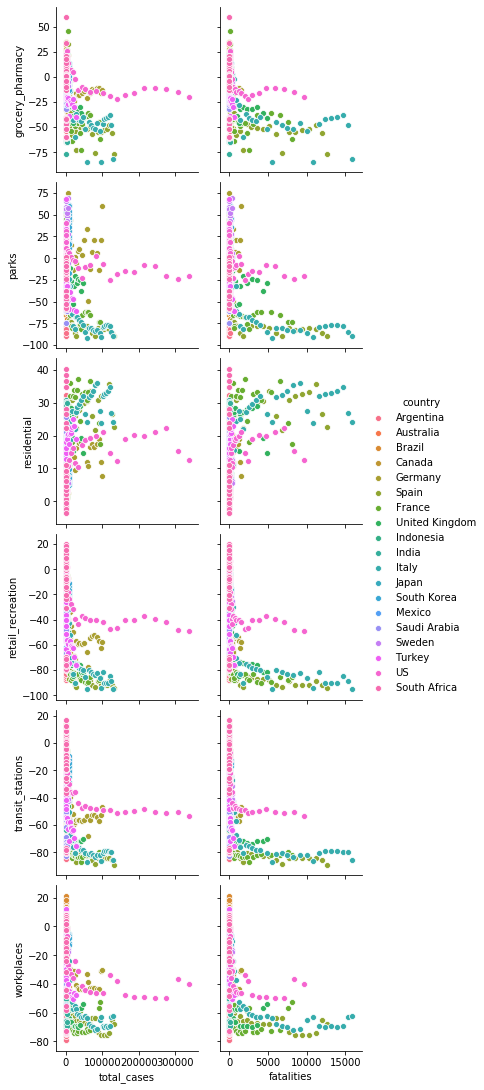

In [4]:


sb.pairplot(covid_data, hue='country',x_vars = ["total_cases","fatalities"], 
            y_vars = ["grocery_pharmacy","parks","residential",
                      "retail_recreation","transit_stations","workplaces"])

In [5]:
covid_data['country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'Germany', 'Spain',
       'France', 'United Kingdom', 'Indonesia', 'India', 'Italy', 'Japan',
       'South Korea', 'Mexico', 'Saudi Arabia', 'Sweden', 'Turkey', 'US',
       'South Africa'], dtype=object)

In [6]:
assert len(covid_data['country'].unique()) == 19

In [7]:
ar_covid_data = covid_data.loc[(covid_data['country'] == 'Argentina')]
au_covid_data = covid_data.loc[(covid_data['country'] == 'Australia')]
br_covid_data = covid_data.loc[(covid_data['country'] == 'Brazil')]
ca_covid_data = covid_data.loc[(covid_data['country'] == 'Canada')]
de_covid_data = covid_data.loc[(covid_data['country'] == 'Germany')]
es_covid_data = covid_data.loc[(covid_data['country'] == 'Spain')]
fr_covid_data = covid_data.loc[(covid_data['country'] == 'France')]
gb_covid_data = covid_data.loc[(covid_data['country'] == 'United Kingdom')]
id_covid_data = covid_data.loc[(covid_data['country'] == 'Indonesia')]
in_covid_data = covid_data.loc[(covid_data['country'] == 'India')]
it_covid_data = covid_data.loc[(covid_data['country'] == 'Italy')]
jp_covid_data = covid_data.loc[(covid_data['country'] == 'Japan')]
kr_covid_data = covid_data.loc[(covid_data['country'] == 'South Korea')]
mx_covid_data = covid_data.loc[(covid_data['country'] == 'Mexico')]
sa_covid_data = covid_data.loc[(covid_data['country'] == 'Saudi Arabia')]
se_covid_data = covid_data.loc[(covid_data['country'] == 'Sweden')]
tr_covid_data = covid_data.loc[(covid_data['country'] == 'Turkey')]
us_covid_data = covid_data.loc[(covid_data['country'] == 'US')]
za_covid_data = covid_data.loc[(covid_data['country'] == 'South Africa')]

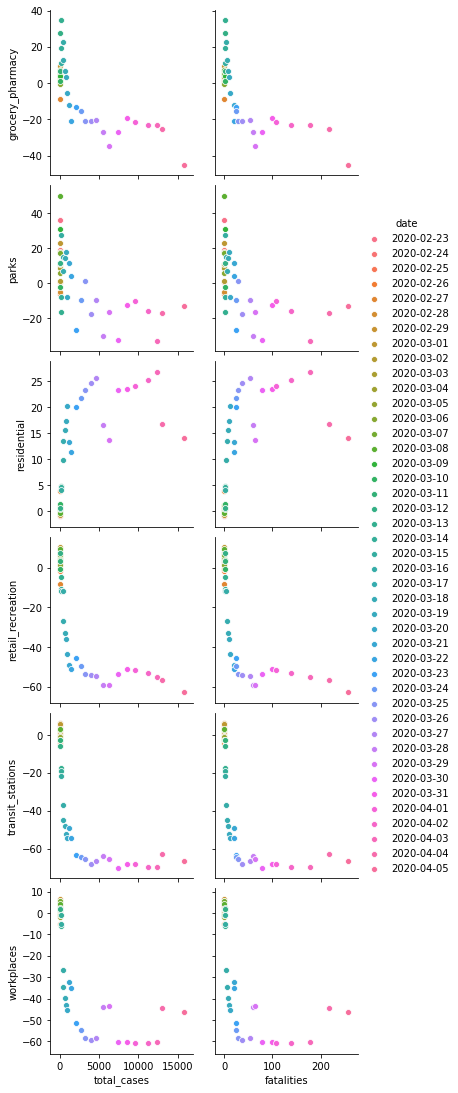

In [8]:
sb.pairplot(ca_covid_data, hue="date", x_vars = ["total_cases","fatalities"], 
            y_vars = ["grocery_pharmacy","parks","residential",
                      "retail_recreation","transit_stations","workplaces"])

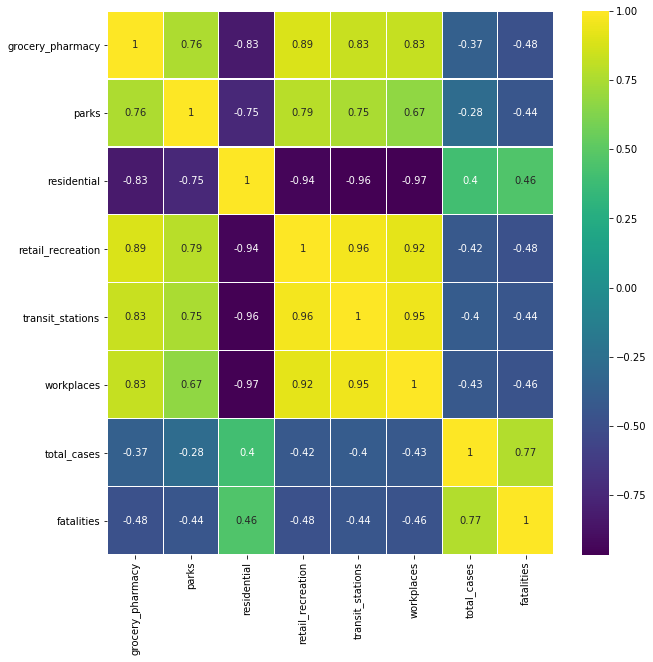

In [9]:
plt.figure(figsize=(10,10))
sb.heatmap(covid_data.corr(),cmap="viridis",
           annot=True,linewidth=0.1)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale

X = ar_covid_data[['total_cases','fatalities']]

Y1 = ar_covid_data['parks']
Y2 = ar_covid_data['residential']

X_train, X_test, Y1_train, Y1_test = train_test_split(X,
                                                      Y1,
                                                      test_size = 0.2,
                                                      random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 34
Testing Data Count: 9


In [39]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

X_train = sm.add_constant(X_train)
results = sm.OLS(Y1_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  parks   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     84.52
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           2.36e-33
Time:                        17:13:18   Log-Likelihood:                -3121.0
No. Observations:                 653   AIC:                             6248.
Df Residuals:                     650   BIC:                             6261.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.5874      1.193     -7.195      0.000     -10.931      -6.244
total_cases     0.0002   5.74e-05      3.130      0.002     6.7e-05       0.000
fatalities     -0.0096      0.001    -10.432      0.000      -0.011      -0.008
==============================================================================
Omnibus:                       14.784   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.217
Skew:                          -0.349   Prob(JB):                     0.000496
Kurtosis:                       3.271   Cond. No.                     3.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
from IPython.display import display
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.datasets import make_regression

X = us_covid_data[['total_cases','fatalities']]

Y1 = us_covid_data['parks']
Y2 = us_covid_data['residential']

X_train, X_test, Y1_train, Y1_test = train_test_split(X,
                                                      Y1,
                                                      test_size = 0.4,
                                                      random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

# Generate a simple dataset
clf = DecisionTreeRegressor(random_state=0, max_depth=5)
clf.fit(X_train, Y1_train)
clf.score(X_test,Y1_test)

Training Data Count: 25
Testing Data Count: 18


0.8131661954882569

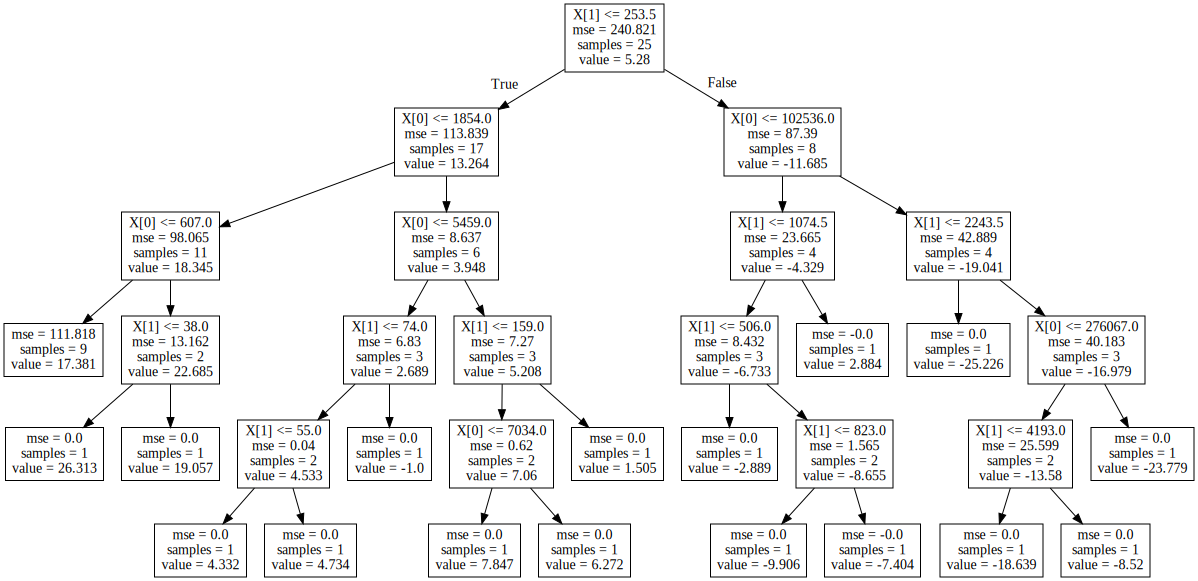

In [160]:
# Visualize the tree
display(graphviz.Source(export_graphviz(clf)))